In [1]:
import torch
import imp
import model
import matplotlib.pyplot as plt

In [3]:
imp.reload(model)
doubleConv = model.DoubleConv(512, 256)
garbo = torch.randn([1, 512, 128, 128])
doubleConv(garbo).shape

torch.Size([1, 256, 124, 124])

In [45]:
imp.reload(model)
unet = model.UNet()
garbo = torch.randn([1, 12, 128, 128])
unet(garbo).shape

torch.Size([1, 24, 64, 64])

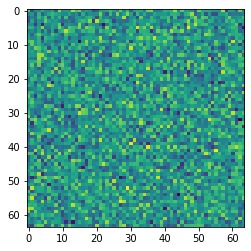

In [10]:
plt.imshow(unet(garbo).detach()[:, 0].view([64,64]), cmap='viridis')
plt.show()

In [43]:
imp.reload(model)
unetthic = model.UNetThic()
garbo = torch.randn([1, 12, 128, 128])
unetthic(garbo).shape

torch.Size([1, 24, 64, 64])

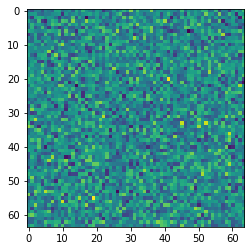

In [13]:
plt.imshow(unetthic(garbo).detach()[:, 0].view([64,64]))
plt.show()

In [19]:
garbo = torch.randn([1, 1024, 6, 6])
garbo0 = garbo.view([-1, 1024, 6*6]).clone()
pp = garbo0.view([-1, 1024, 6, 6])
torch.equal(garbo,pp)

True

In [46]:
imp.reload(model)
unetatt = model.AttentionUNet()
garbo = torch.randn([1, 12, 128, 128])
unetatt(garbo).shape

torch.Size([1, 24, 64, 64])

In [29]:
q = torch.randn([1, 512, 30, 30])
kv = torch.randn([1, 1024, 6, 6])
q = q.view([1, 512, 30*30])
kv = kv.view([1, 1024, 6*6])
mh = torch.nn.MultiheadAttention(batch_first=True, embed_dim=30*30, num_heads=10, kdim=6*6, vdim=6*6)
attn, _ = mh(q, kv, kv)
attn.shape
attn.view([-1, 512, 30, 30]).shape

torch.Size([1, 512, 30, 30])